In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 26.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.1 MB/s eta 0:00:00


In [34]:
!pip install -q transformers datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.3/519.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 6.5 MB/s eta 0:00:00


In [3]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import torch
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
import numpy as np

In [73]:
from glob import glob
img = glob('/content/drive/MyDrive/골프영상/seg_test/*.jpg')

In [60]:
img[0]

'/content/drive/MyDrive/골프영상/seg_test/testimg1.jpg'

In [61]:
segmentation_map = Image.open(img[9])

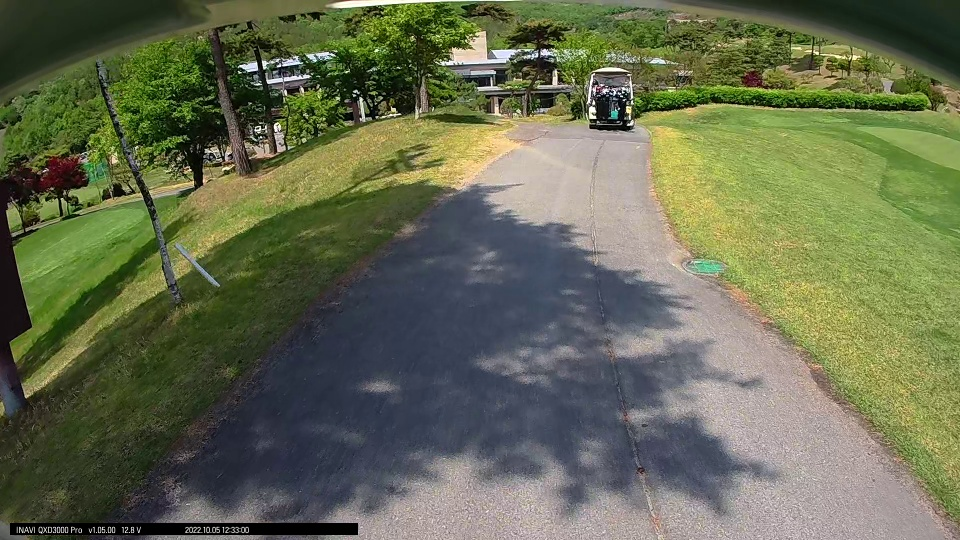

In [67]:
segmentation_map

In [23]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [40]:
feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b3-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b3-finetuned-ade-512-512")

In [25]:
model.to(device)

SegformerForSemanticSegmentation(
  (segformer): SegformerModel(
    (encoder): SegformerEncoder(
      (patch_embeddings): ModuleList(
        (0): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(3, 64, kernel_size=(7, 7), stride=(4, 4), padding=(3, 3))
          (layer_norm): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        )
        (1): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(64, 128, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
        )
        (2): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(128, 320, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
        )
        (3): SegformerOverlapPatchEmbeddings(
          (proj): Conv2d(320, 512, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)

In [26]:
model(pixel_values)

NameError: ignored

In [6]:
sclass_colors = np.full((183,3), 0, dtype=np.uint16)
class_colors[5] = [100,100,100]
class_colors[7] = [200,200,200]
class_colors[10] = [10,10,200]
class_colors[53] = [30,30,100]

In [69]:
class_colors = np.random.randint(0, 255, size=(183, 3), dtype=np.uint8)
class_colors[4] = [255,187,0] # Tree 주황
class_colors[6] = [171,242,0] # Road 연초록
class_colors[9] = [0,216,255] # Grass 하늘
class_colors[52] = [255,0,211] # Path 핑크
for i in range(0,10):
    ii = img[i]
    image = Image.open(ii)

    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1)
    colored_masks = class_colors[predicted_labels[0]]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(colored_masks)
    plt.title("Colored Mask")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

(-0.5, 127.5, 127.5, -0.5)

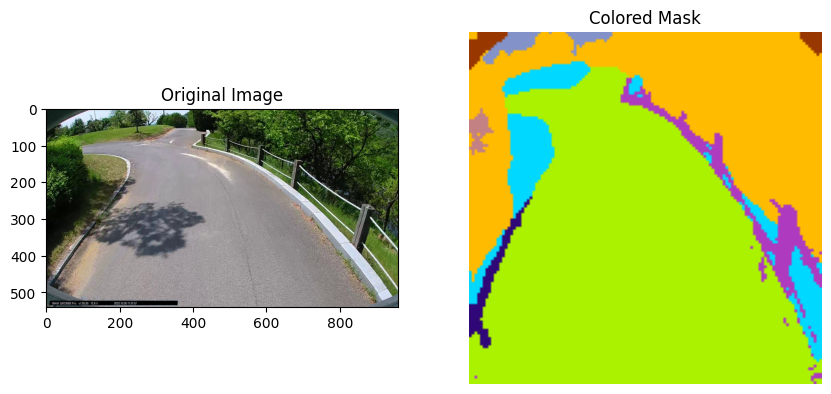

In [84]:
sclass_colors = np.full((183,3), 0, dtype=np.uint16)
class_colors[4] = [255,187,0] # Tree 주황
class_colors[6] = [171,242,0] # Road 연초록
class_colors[9] = [0,216,255] # Grass 하늘
class_colors[52] = [255,0,211] # Path 핑크

ii = img[0]
image = Image.open('/content/drive/MyDrive/골프영상/주행영상_6/REC_2022_10_05_11_30_57_F/frame4197.jpg')

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
probabilities = torch.softmax(logits, dim=1)
predicted_labels = torch.argmax(probabilities, dim=1)
colored_masks = class_colors[predicted_labels[0]]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(colored_masks)
plt.title("Colored Mask")
plt.axis('off')

In [82]:
iimm = Image.open('/content/drive/MyDrive/골프영상/주행영상_6/REC_2022_10_05_11_30_57_F/frame4197.jpg')

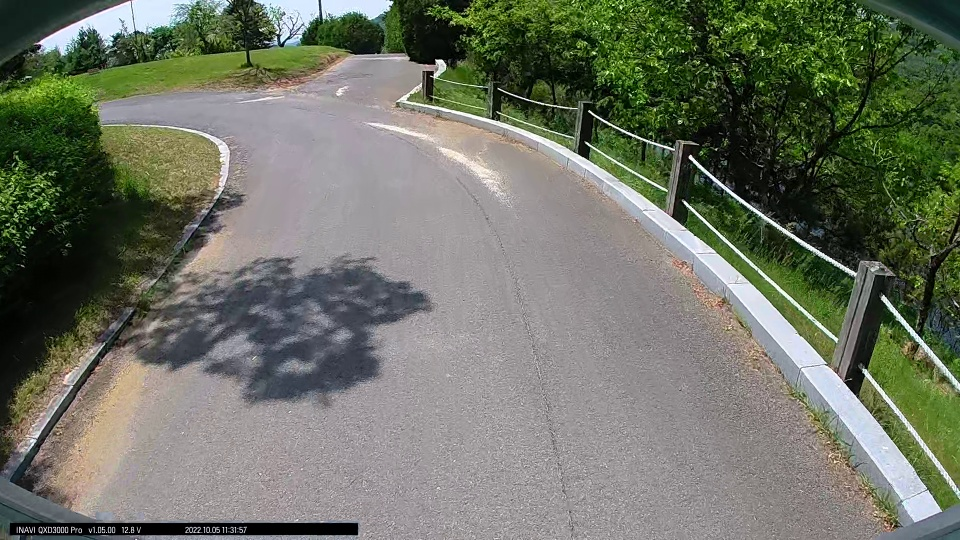

In [78]:
iimm

(-0.5, 127.5, 127.5, -0.5)

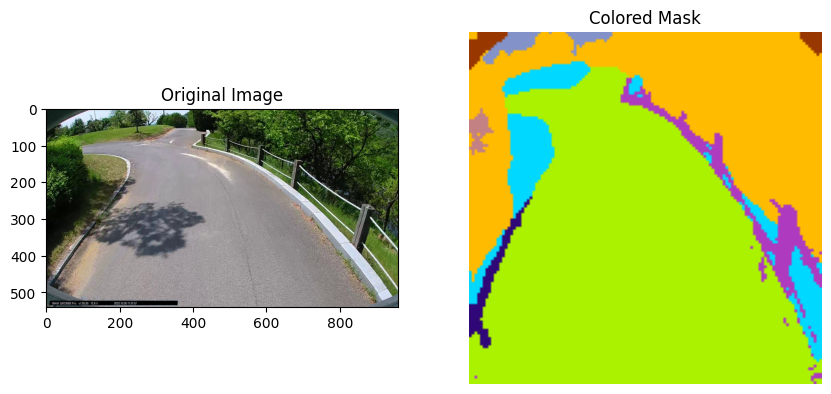

In [80]:
class_colors = np.random.randint(0, 255, size=(183, 3), dtype=np.uint8)
class_colors[4] = [255,187,0] # Tree 주황
class_colors[6] = [171,242,0] # Road 연초록
class_colors[9] = [0,216,255] # Grass 하늘
class_colors[52] = [255,0,211] # Path 핑크

ii = iimm
image = ii

inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits
probabilities = torch.softmax(logits, dim=1)
predicted_labels = torch.argmax(probabilities, dim=1)
colored_masks = class_colors[predicted_labels[0]]
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(colored_masks)
plt.title("Colored Mask")
plt.axis('off')

In [72]:
img

array([[[30, 32, 19],
        [30, 32, 19],
        [29, 31, 20],
        ...,
        [16, 23, 14],
        [16, 23, 14],
        [16, 23, 14]],

       [[30, 32, 19],
        [30, 32, 19],
        [29, 31, 20],
        ...,
        [16, 23, 14],
        [16, 23, 14],
        [16, 23, 14]],

       [[30, 32, 19],
        [29, 31, 19],
        [29, 31, 20],
        ...,
        [16, 23, 14],
        [16, 23, 14],
        [16, 23, 14]],

       ...,

       [[39, 40, 38],
        [40, 41, 39],
        [41, 42, 40],
        ...,
        [67, 58, 55],
        [70, 61, 58],
        [64, 55, 52]],

       [[39, 40, 39],
        [39, 40, 39],
        [38, 39, 38],
        ...,
        [63, 55, 51],
        [73, 66, 62],
        [77, 69, 66]],

       [[40, 41, 39],
        [39, 40, 38],
        [37, 38, 36],
        ...,
        [66, 58, 54],
        [70, 62, 59],
        [74, 66, 63]]], dtype=uint8)

In [75]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[255,187,0], [171,242,0], [0,216,255], [255,0,211]]

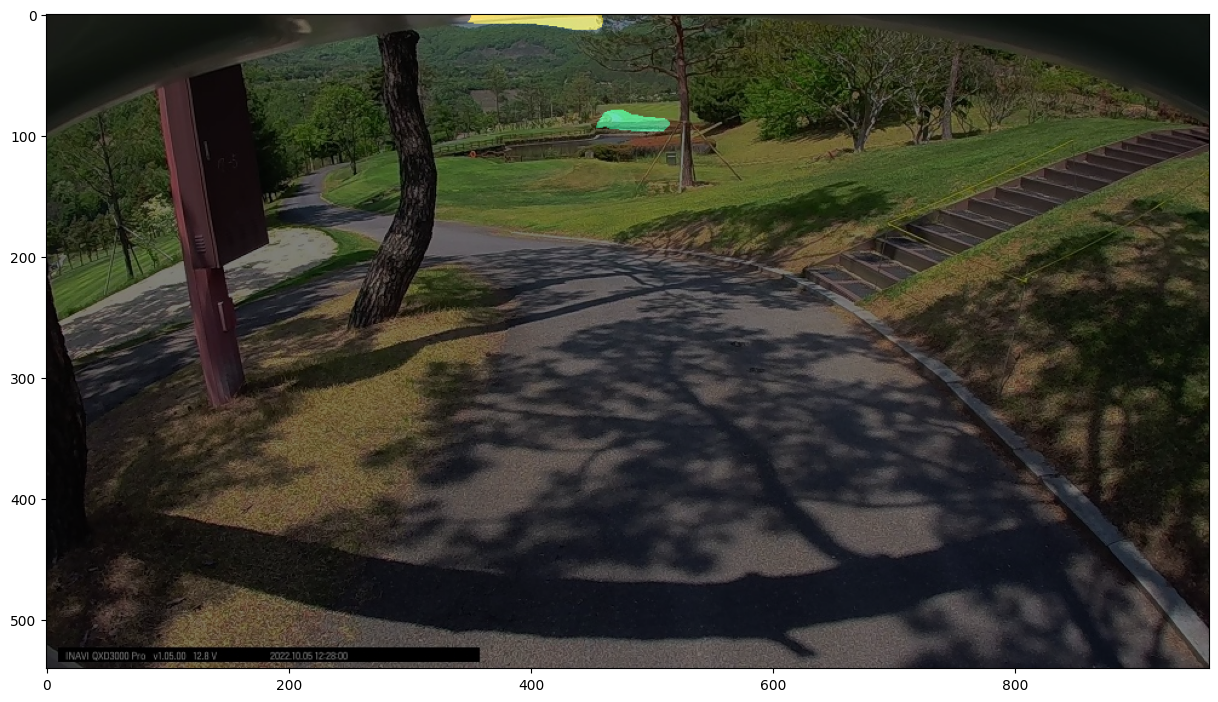

In [76]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt

# First, rescale logits to original image size
logits = nn.functional.interpolate(outputs.logits.detach().cpu(),
                size=image.size[::-1], # (height, width)
                mode='bilinear',
                align_corners=False)

# Second, apply argmax on the class dimension
seg = logits.argmax(dim=1)[0]
color_seg = np.zeros((seg.shape[0], seg.shape[1], 3), dtype=np.uint8) # height, width, 3
palette = np.array(ade_palette())
for label, color in enumerate(palette):
    color_seg[seg == label, :] = color
# Convert to BGR
color_seg = color_seg[..., ::-1]

# Show image + mask
img = np.array(image) * 0.5 + color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

In [85]:
def ade_palette():
    """ADE20K palette that maps each class to RGB values."""
    return [[120, 120, 120], [180, 120, 120], [6, 230, 230], [80, 50, 50],
            [4, 200, 3], [120, 120, 80], [140, 140, 140], [204, 5, 255],
            [230, 230, 230], [4, 250, 7], [224, 5, 255], [235, 255, 7],
            [150, 5, 61], [120, 120, 70], [8, 255, 51], [255, 6, 82],
            [143, 255, 140], [204, 255, 4], [255, 51, 7], [204, 70, 3],
            [0, 102, 200], [61, 230, 250], [255, 6, 51], [11, 102, 255],
            [255, 7, 71], [255, 9, 224], [9, 7, 230], [220, 220, 220],
            [255, 9, 92], [112, 9, 255], [8, 255, 214], [7, 255, 224],
            [255, 184, 6], [10, 255, 71], [255, 41, 10], [7, 255, 255],
            [224, 255, 8], [102, 8, 255], [255, 61, 6], [255, 194, 7],
            [255, 122, 8], [0, 255, 20], [255, 8, 41], [255, 5, 153],
            [6, 51, 255], [235, 12, 255], [160, 150, 20], [0, 163, 255],
            [140, 140, 140], [250, 10, 15], [20, 255, 0], [31, 255, 0],
            [255, 31, 0], [255, 224, 0], [153, 255, 0], [0, 0, 255],
            [255, 71, 0], [0, 235, 255], [0, 173, 255], [31, 0, 255],
            [11, 200, 200], [255, 82, 0], [0, 255, 245], [0, 61, 255],
            [0, 255, 112], [0, 255, 133], [255, 0, 0], [255, 163, 0],
            [255, 102, 0], [194, 255, 0], [0, 143, 255], [51, 255, 0],
            [0, 82, 255], [0, 255, 41], [0, 255, 173], [10, 0, 255],
            [173, 255, 0], [0, 255, 153], [255, 92, 0], [255, 0, 255],
            [255, 0, 245], [255, 0, 102], [255, 173, 0], [255, 0, 20],
            [255, 184, 184], [0, 31, 255], [0, 255, 61], [0, 71, 255],
            [255, 0, 204], [0, 255, 194], [0, 255, 82], [0, 10, 255],
            [0, 112, 255], [51, 0, 255], [0, 194, 255], [0, 122, 255],
            [0, 255, 163], [255, 153, 0], [0, 255, 10], [255, 112, 0],
            [143, 255, 0], [82, 0, 255], [163, 255, 0], [255, 235, 0],
            [8, 184, 170], [133, 0, 255], [0, 255, 92], [184, 0, 255],
            [255, 0, 31], [0, 184, 255], [0, 214, 255], [255, 0, 112],
            [92, 255, 0], [0, 224, 255], [112, 224, 255], [70, 184, 160],
            [163, 0, 255], [153, 0, 255], [71, 255, 0], [255, 0, 163],
            [255, 204, 0], [255, 0, 143], [0, 255, 235], [133, 255, 0],
            [255, 0, 235], [245, 0, 255], [255, 0, 122], [255, 245, 0],
            [10, 190, 212], [214, 255, 0], [0, 204, 255], [20, 0, 255],
            [255, 255, 0], [0, 153, 255], [0, 41, 255], [0, 255, 204],
            [41, 0, 255], [41, 255, 0], [173, 0, 255], [0, 245, 255],
            [71, 0, 255], [122, 0, 255], [0, 255, 184], [0, 92, 255],
            [184, 255, 0], [0, 133, 255], [255, 214, 0], [25, 194, 194],
            [102, 255, 0], [92, 0, 255]]


In [86]:
import numpy as np

ground_truth_seg = np.array(segmentation_map) # 2D ground truth segmentation map
ground_truth_color_seg = np.zeros((ground_truth_seg.shape[0], ground_truth_seg.shape[1], 3), dtype=np.uint8) # height, width, 3
for label, color in enumerate(palette):
    ground_truth_color_seg[ground_truth_seg - 1 == label, :] = color
# Convert to BGR
ground_truth_color_seg = ground_truth_color_seg[..., ::-1]

img = np.array(image) * 0.5 + ground_truth_color_seg * 0.5
img = img.astype(np.uint8)

plt.figure(figsize=(15, 10))
plt.imshow(img)
plt.show()

IndexError: ignored

In [ ]:
class_colors = np.full((183,3), 0, dtype=np.uint16)
class_colors[6] = [100,100,100]
class_colors[9] = [200,200,200]
class_colors[0] = [10,10,200]
class_colors[13] = [30,30,100]
class_colors[52] = [50,50,220]
for i in range(0,10):
    ii = img[i]
    image = Image.open(ii)

    inputs = feature_extractor(images=image, return_tensors="pt")
    outputs = model(**inputs)
    logits = outputs.logits
    probabilities = torch.softmax(logits, dim=1)
    predicted_labels = torch.argmax(probabilities, dim=1)
    colored_masks = class_colors[predicted_labels[0]]
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")

    plt.subplot(1, 2, 2)
    plt.imshow(colored_masks)
    plt.title("Colored Mask")
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
class_colors = np.random.randint(0, 255, size=(183, 3), dtype=np.uint8)

In [ ]:
probabilities[0][30]

tensor([[1.2693e-05, 7.1301e-06, 7.3854e-06, 9.6285e-06, 1.1060e-05, 8.8667e-06,
         7.2364e-06, 7.8080e-06, 6.5993e-06, 4.6141e-06, 2.2521e-06, 8.0410e-07,
         5.2416e-07, 5.8246e-07, 6.6732e-07, 7.2097e-07, 7.5361e-07, 7.9208e-07,
         8.0967e-07, 7.0351e-07, 7.1002e-07, 7.0998e-07, 8.3538e-07, 1.6606e-06,
         3.8052e-06, 4.6612e-06, 6.8521e-06, 7.0573e-06, 6.0483e-06, 5.1404e-06,
         4.7445e-06, 3.8838e-06, 3.3867e-06, 2.7950e-06, 2.0495e-06, 2.1938e-06,
         2.7699e-06, 2.3829e-06, 2.5862e-06, 3.0999e-06, 1.9324e-06, 2.2518e-06,
         6.0843e-06, 1.6790e-05, 1.5970e-05, 1.0950e-05, 1.1475e-05, 9.0030e-06,
         5.1849e-06, 3.2977e-06, 3.7712e-06, 4.6997e-06, 5.8003e-06, 1.0217e-05,
         1.4184e-05, 1.9357e-05, 2.2950e-05, 2.5804e-05, 2.5321e-05, 1.6569e-05,
         1.2184e-05, 1.0440e-05, 1.1340e-05, 1.3602e-05, 1.6806e-05, 1.4518e-05,
         8.1765e-06, 3.3845e-06, 1.2839e-06, 4.8681e-07, 1.8616e-07, 1.8056e-07,
         2.2028e-07, 1.4822e

In [ ]:
colored_masks

array([[[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       ...,

       [[100, 100, 100],
        [200, 200, 200],
        [200, 200, 200],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [100, 100, 100]],

       [[100, 100, 100],
        [200, 200, 200],
        [200, 200, 200],
        ...,
        [100, 100, 100],
        [  0,   0,   0],
        [100, 100, 100]],

       [[200, 200, 200],
        [  0,   0,   0],
        [  0,   0,   0],
        ...,
        [100, 100, 100],
        [  0,   0,   0],
        [  0,   0,   0]]

In [ ]:
probabilities

In [ ]:
torch.set_printoptions(profile="full")

In [ ]:
predicted_labels

tensor([[[  5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5, 106, 106, 106,
          106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,   5,
            5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
            5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
            4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
            4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
            5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
            5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
            5,   5,   5, 106,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
            5,   5],
         [  5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5, 106, 106, 106,
          106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106, 106,
            5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,   5,
            5,   4,

In [ ]:
predicted_labels

tensor([[[ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  5],
         [ 5,  5,  5,  ...,  5,  5,  5],
         ...,
         [ 6,  9,  9,  ..., 52, 52,  6],
         [ 6,  9,  9,  ...,  6, 52,  6],
         [ 9, 52, 52,  ...,  6, 52, 52]]])